In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
links = pd.read_csv('email-links-all.csv')

In [3]:
links.shape

(614586, 3)

In [4]:
links.head()

,Date,From,To
0,2001-05-14 23:39:00,phillip.allen@enron.com,tim.belden@enron.com
1,2001-05-04 20:51:00,phillip.allen@enron.com,john.lavorato@enron.com
2,2000-10-18 10:00:00,phillip.allen@enron.com,leah.arsdall@enron.com
3,2000-10-23 13:13:00,phillip.allen@enron.com,randall.gay@enron.com
4,2000-08-31 12:07:00,phillip.allen@enron.com,greg.piper@enron.com


Count the number of contact events between emails

In [5]:
weight_counts = links.groupby(['From', 'To']).size().reset_index(name = 'Count')
weight_counts.to_csv('weighted_links.csv', index=False)

In [6]:
weight_counts.shape

(83777, 3)

In [7]:
weight_counts.sort_values('Count').head()

,From,To,Count
0,101qi@msn.com,enlvwvz@msn.com,1
39637,karen.snow@enron.com,karen.snow@enron.com,1
39639,karen.snow@enron.com,victor.lamadrid@enron.com,1
39647,karen.white@csfb.com,klay@enron.com,1
39648,karen@mpenner.com,jarnold@enron.com,1


In [8]:
thresholded = weight_counts.loc[weight_counts['Count'] > 10]

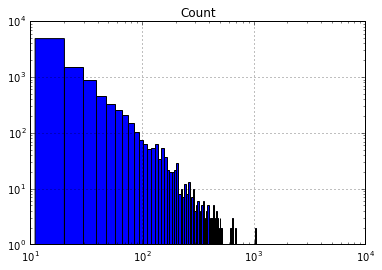

In [9]:
fig, ax = plt.subplots()
thresholded.hist(ax=ax, column='Count', bins=1000)
ax.set_xscale('log')
ax.set_yscale('log')

Count From messages per email

In [10]:
from_counts = links.groupby(['From']).size().reset_index(name = 'CountFrom')
from_counts.sort_values('CountFrom').shape

(12661, 2)

In [11]:
from_spikes = links.groupby('From')['Date'].apply(list)
from_spikes.size

12661

In [12]:
from_spikes = from_spikes[from_spikes.str.len() > 3]
from_spikes.size

6601

In [13]:
from_spikes

From
1800flowers@shop2u.com                         [2000-11-21 01:21:00, 2000-11-21 01:21:00, 200...
2000greetings@postalmanager.com                [2002-01-08 18:25:48, 2002-01-22 17:53:03, 200...
2740741@skytel.com                             [2000-09-06 15:34:00, 2000-09-06 16:33:00, 200...
40ees@enron.com                                [2001-10-05 18:45:16, 2001-10-05 18:45:16, 200...
40enron@enron.com                              [2001-06-06 18:08:58, 2001-05-03 19:48:48, 200...
7409949@skytel.com                             [2001-06-26 17:07:00, 2001-07-18 21:04:00, 200...
7409950@skytel.com                             [2001-11-25 20:17:03, 2001-11-25 20:22:26, 200...
8774754543@skytel.com                          [2001-11-17 17:51:21, 2002-01-17 15:34:43, 200...
8777865122@skytel.com                          [2002-01-10 19:10:59, 2002-01-10 19:00:10, 200...
9069761@skytel.com                             [2001-07-18 20:20:00, 2000-11-07 13:47:00, 200...
9069876@skytel.com       